Graphing Fireams in America


Team members Tulgaa, Mike, Enerel and Gene into Github account https://github.com/vabigdatamover/dream-team

Graph 1 Permit BarLine Graph
Graph 2 Handguns Bar Graph
Graph 3 Long Guns Bar Graph
Graph 4 Scatter Plots with population

In [3]:
#Variable, dependables and setup
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [114]:
#World Atlas.COM
# File to Load 
state_population_to_load = "input/state_populations.csv"

# Read the firearms data
population_data = pd.read_csv(state_population_to_load)
population_data.head()

,pop_rank,state,population
0,1,California,"39,536,653"
1,2,Texas,"28,304,596"
2,3,Florida,"20,984,400"
3,4,New York,"19,849,399"
4,5,Pennsylvania,"12,805,537"


In [154]:
# File to Load 
fireams_data_to_load = "input/nics-firearm-background-checks.csv"

# Read the firearms data
firearms_data = pd.read_csv(fireams_data_to_load)
firearms_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-06,Alabama,28449.0,499.0,6947.0,4521.0,298.0,432,0.0,19.0,...,0.0,0.0,0.0,10.0,11.0,1.0,0.0,0.0,1.0,42898
1,2019-06,Alaska,251.0,6.0,2465.0,2000.0,239.0,182,0.0,0.0,...,0.0,0.0,0.0,14.0,12.0,2.0,0.0,0.0,0.0,5557
2,2019-06,Arizona,5371.0,438.0,11375.0,5931.0,1309.0,656,0.0,14.0,...,4.0,0.0,0.0,13.0,7.0,5.0,2.0,0.0,0.0,26746
3,2019-06,Arkansas,2690.0,559.0,4653.0,3214.0,292.0,458,8.0,11.0,...,0.0,0.0,0.0,9.0,10.0,1.0,0.0,2.0,0.0,13956
4,2019-06,California,39303.0,0.0,38712.0,27050.0,4856.0,0,5040.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115987


In [116]:
# Combine the data into a single dataset with a left merge on "state"
data_complete = pd.merge(firearms_data, population_data, how="left", on=["state", "state"])
data_complete.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,pop_rank,population
0,2019-06,Alabama,28449.0,499.0,6947.0,4521.0,298.0,432,0.0,19.0,...,0.0,10.0,11.0,1.0,0.0,0.0,1.0,42898,24.0,"4,874,747"
1,2019-06,Alaska,251.0,6.0,2465.0,2000.0,239.0,182,0.0,0.0,...,0.0,14.0,12.0,2.0,0.0,0.0,0.0,5557,48.0,"739,795"
2,2019-06,Arizona,5371.0,438.0,11375.0,5931.0,1309.0,656,0.0,14.0,...,0.0,13.0,7.0,5.0,2.0,0.0,0.0,26746,14.0,"7,016,270"
3,2019-06,Arkansas,2690.0,559.0,4653.0,3214.0,292.0,458,8.0,11.0,...,0.0,9.0,10.0,1.0,0.0,2.0,0.0,13956,32.0,"3,004,279"
4,2019-06,California,39303.0,0.0,38712.0,27050.0,4856.0,0,5040.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115987,1.0,"39,536,653"


In [117]:
firearms_2017 = data_complete[data_complete['month'].str.contains('2017')]
firearms_2017.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,pop_rank,population
990,2017-12,Alabama,24496.0,0.0,12895.0,15765.0,390.0,513,0.0,16.0,...,0.0,37.0,29.0,4.0,0.0,0.0,0.0,56545,24.0,"4,874,747"
991,2017-12,Alaska,249.0,3.0,3675.0,3524.0,287.0,174,0.0,4.0,...,0.0,16.0,27.0,4.0,0.0,0.0,0.0,8330,48.0,"739,795"
992,2017-12,Arizona,6243.0,415.0,17566.0,12840.0,1414.0,784,0.0,14.0,...,0.0,41.0,25.0,3.0,1.0,1.0,1.0,41559,14.0,"7,016,270"
993,2017-12,Arkansas,3339.0,590.0,9189.0,13104.0,347.0,440,40.0,8.0,...,0.0,23.0,32.0,4.0,0.0,0.0,0.0,29559,32.0,"3,004,279"
994,2017-12,California,53885.0,0.0,47613.0,35240.0,4885.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142492,1.0,"39,536,653"


In [157]:
#sum handguns by state
state_handguns_sum = firearms_2017.groupby(['state'])['handgun'].sum()
handgun_df = pd.DataFrame([state_handguns_sum]).T
handgun_df['state'] = df.index
handgun_df.head()

,handgun,state
state,,
Alabama,97751.0,Alabama
Alaska,34556.0,Alaska
Arizona,153522.0,Arizona
Arkansas,72100.0,Arkansas
California,512465.0,California


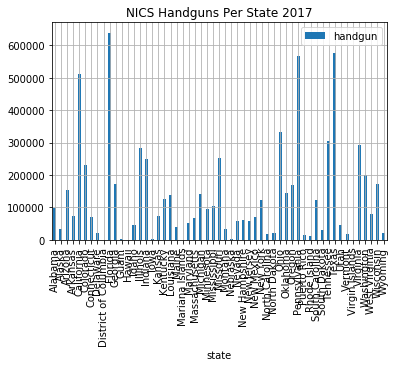

In [189]:
ax1 = handgun_df.plot.bar(x='state', y='handgun')

# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Handguns Per State 2017')
#plt.xlabel('x label text')
#plt.ylabel('y label text')
plt.savefig('output/handguns2017.png', bbox_inches="tight")

In [198]:
#sum longguns by state
state_longguns_sum = firearms_2017.groupby(['state'])['long_gun'].sum()
longgun_df = pd.DataFrame([state_longguns_sum]).T
longgun_df['state'] = df.index
longgun_df.head()

,long_gun,state
state,,
Alabama,86210.0,Alabama
Alaska,32648.0,Alaska
Arizona,99248.0,Arizona
Arkansas,76765.0,Arkansas
California,318133.0,California


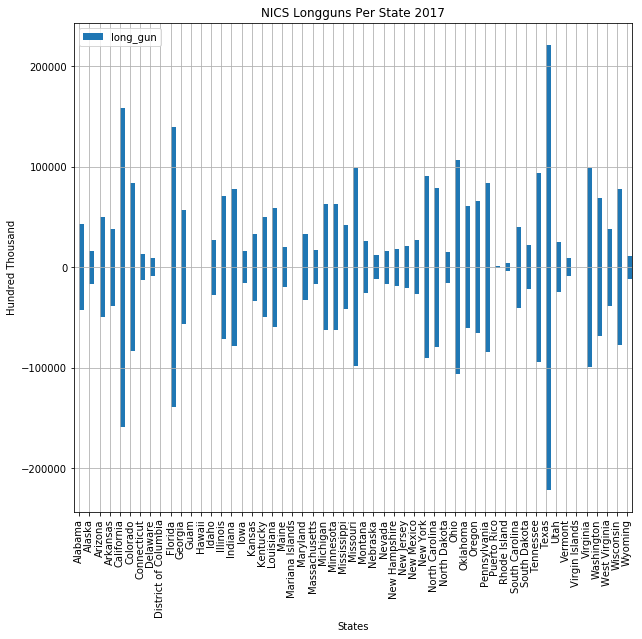

<Figure size 432x288 with 0 Axes>

In [222]:
ax1 = longgun_df.plot.bar(x='state', y='long_gun',figsize=(10,9), orientation='horizontal')

# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Longguns Per State 2017')
plt.xlabel('States')
plt.ylabel('Hundred Thousand')
#plt.gcf().invert_yaxis()
plt.show()
plt.savefig('output/longguns2017.png', bbox_inches="tight")

In [201]:
#sum Permits by state
state_permits_sum = firearms_2017.groupby(['state'])['permit'].sum()
permit_df = pd.DataFrame([state_permits_sum]).T
permit_df['state'] = df.index
permit_df.head()

,permit,state
state,,
Alabama,253338.0,Alabama
Alaska,2923.0,Alaska
Arizona,81734.0,Arizona
Arkansas,39473.0,Arkansas
California,689851.0,California


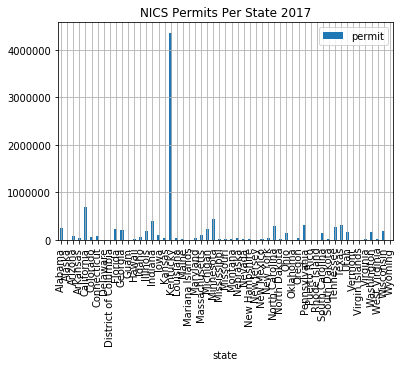

In [193]:
ax1 = permit_df.plot.bar(x='state', y='permit')

# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Permits Per State 2017')
#plt.xlabel('x label text')
#plt.ylabel('y label text')
plt.savefig('output/permits2017.png', bbox_inches="tight")

In [163]:
print(population_data[population_data["state"] == "Texas"]['population'])
population_data.head()

1    28,304,596
Name: population, dtype: object


,pop_rank,state,population
0,1,California,"39,536,653"
1,2,Texas,"28,304,596"
2,3,Florida,"20,984,400"
3,4,New York,"19,849,399"
4,5,Pennsylvania,"12,805,537"


In [ ]:
#group by type to be used by all pie charts
by_type = transportation_data_complete.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

#pie chart build lables
labels = fare_sum.index

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

#Explodes the "Rural" and "Suburban" areas from "Urban"
explode = [0 , 0, .1]

#Creates Pie
plt.pie(fare_sum, startangle = 145, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
# Save Figure
plt.savefig("PyberFareCityType.png")
#Show Plot
plt.show()

In [182]:
firearms_jan_2017 = data_complete[data_complete['month'].str.contains('2017-01')]
jan_handguns_sum = firearms_jan_2017.groupby(['state'])['handgun'].sum()
jan_handgun_df = pd.DataFrame([jan_handguns_sum]).T
jan_handgun_df['state'] = df.index
firearms_feb_2017 = data_complete[data_complete['month'].str.contains('2017-02')]
feb_handguns_sum = firearms_feb_2017.groupby(['state'])['handgun'].sum()
feb_handgun_df = pd.DataFrame([feb_handguns_sum]).T
feb_handgun_df['state'] = df.index
firearms_mar_2017 = data_complete[data_complete['month'].str.contains('2017-03')]
mar_handguns_sum = firearms_mar_2017.groupby(['state'])['handgun'].sum()
mar_handgun_df = pd.DataFrame([mar_handguns_sum]).T
mar_handgun_df['state'] = df.index
firearms_apr_2017 = data_complete[data_complete['month'].str.contains('2017-04')]
apr_handguns_sum = firearms_apr_2017.groupby(['state'])['handgun'].sum()
apr_handgun_df = pd.DataFrame([apr_handguns_sum]).T
apr_handgun_df['state'] = df.index
firearms_may_2017 = data_complete[data_complete['month'].str.contains('2017-05')]
may_handguns_sum = firearms_may_2017.groupby(['state'])['handgun'].sum()
may_handgun_df = pd.DataFrame([may_handguns_sum]).T
may_handgun_df['state'] = df.index
firearms_jun_2017 = data_complete[data_complete['month'].str.contains('2017-06')]
jun_handguns_sum = firearms_jun_2017.groupby(['state'])['handgun'].sum()
jun_handgun_df = pd.DataFrame([jun_handguns_sum]).T
jun_handgun_df['state'] = df.index
firearms_jul_2017 = data_complete[data_complete['month'].str.contains('2017-07')]
jul_handguns_sum = firearms_jul_2017.groupby(['state'])['handgun'].sum()
jul_handgun_df = pd.DataFrame([jul_handguns_sum]).T
jul_handgun_df['state'] = df.index
firearms_aug_2017 = data_complete[data_complete['month'].str.contains('2017-08')]
aug_handguns_sum = firearms_aug_2017.groupby(['state'])['handgun'].sum()
aug_handgun_df = pd.DataFrame([aug_handguns_sum]).T
aug_handgun_df['state'] = df.index
firearms_sep_2017 = data_complete[data_complete['month'].str.contains('2017-09')]
sep_handguns_sum = firearms_sep_2017.groupby(['state'])['handgun'].sum()
sep_handgun_df = pd.DataFrame([sep_handguns_sum]).T
sep_handgun_df['state'] = df.index
firearms_oct_2017 = data_complete[data_complete['month'].str.contains('2017-10')]
oct_handguns_sum = firearms_oct_2017.groupby(['state'])['handgun'].sum()
oct_handgun_df = pd.DataFrame([oct_handguns_sum]).T
oct_handgun_df['state'] = df.index
firearms_nov_2017 = data_complete[data_complete['month'].str.contains('2017-11')]
nov_handguns_sum = firearms_nov_2017.groupby(['state'])['handgun'].sum()
nov_handgun_df = pd.DataFrame([nov_handguns_sum]).T
nov_handgun_df['state'] = df.index
firearms_dec_2017 = data_complete[data_complete['month'].str.contains('2017-12')]
dec_handguns_sum = firearms_dec_2017.groupby(['state'])['handgun'].sum()
dec_handgun_df = pd.DataFrame([dec_handguns_sum]).T
dec_handgun_df['state'] = df.index

In [184]:
firearms_jan_2017 = data_complete[data_complete['month'].str.contains('2017-01')]
jan_longguns_sum = firearms_jan_2017.groupby(['state'])['long_gun'].sum()
jan_longgun_df = pd.DataFrame([jan_longguns_sum]).T
jan_longgun_df['state'] = df.index
firearms_feb_2017 = data_complete[data_complete['month'].str.contains('2017-02')]
feb_longguns_sum = firearms_feb_2017.groupby(['state'])['long_gun'].sum()
feb_longgun_df = pd.DataFrame([feb_longguns_sum]).T
feb_longgun_df['state'] = df.index
firearms_mar_2017 = data_complete[data_complete['month'].str.contains('2017-03')]
mar_longguns_sum = firearms_mar_2017.groupby(['state'])['long_gun'].sum()
mar_longgun_df = pd.DataFrame([mar_longguns_sum]).T
mar_longgun_df['state'] = df.index
firearms_apr_2017 = data_complete[data_complete['month'].str.contains('2017-04')]
apr_longguns_sum = firearms_apr_2017.groupby(['state'])['long_gun'].sum()
apr_longgun_df = pd.DataFrame([apr_longguns_sum]).T
apr_longgun_df['state'] = df.index
firearms_may_2017 = data_complete[data_complete['month'].str.contains('2017-05')]
may_longguns_sum = firearms_may_2017.groupby(['state'])['long_gun'].sum()
may_longgun_df = pd.DataFrame([may_longguns_sum]).T
may_longgun_df['state'] = df.index
firearms_jun_2017 = data_complete[data_complete['month'].str.contains('2017-06')]
jun_longguns_sum = firearms_jun_2017.groupby(['state'])['long_gun'].sum()
jun_longgun_df = pd.DataFrame([jun_longguns_sum]).T
jun_longgun_df['state'] = df.index
firearms_jul_2017 = data_complete[data_complete['month'].str.contains('2017-07')]
jul_longguns_sum = firearms_jul_2017.groupby(['state'])['long_gun'].sum()
jul_longgun_df = pd.DataFrame([jul_longguns_sum]).T
jul_longgun_df['state'] = df.index
firearms_aug_2017 = data_complete[data_complete['month'].str.contains('2017-08')]
aug_longguns_sum = firearms_aug_2017.groupby(['state'])['long_gun'].sum()
aug_longgun_df = pd.DataFrame([aug_longguns_sum]).T
aug_longgun_df['state'] = df.index
firearms_sep_2017 = data_complete[data_complete['month'].str.contains('2017-09')]
sep_longguns_sum = firearms_sep_2017.groupby(['state'])['long_gun'].sum()
sep_longgun_df = pd.DataFrame([sep_longguns_sum]).T
sep_longgun_df['state'] = df.index
firearms_oct_2017 = data_complete[data_complete['month'].str.contains('2017-10')]
oct_longguns_sum = firearms_oct_2017.groupby(['state'])['long_gun'].sum()
oct_longgun_df = pd.DataFrame([oct_longguns_sum]).T
oct_longgun_df['state'] = df.index
firearms_nov_2017 = data_complete[data_complete['month'].str.contains('2017-11')]
nov_longguns_sum = firearms_nov_2017.groupby(['state'])['long_gun'].sum()
nov_longgun_df = pd.DataFrame([nov_longguns_sum]).T
nov_longgun_df['state'] = df.index
firearms_dec_2017 = data_complete[data_complete['month'].str.contains('2017-12')]
dec_longguns_sum = firearms_dec_2017.groupby(['state'])['long_gun'].sum()
dec_longgun_df = pd.DataFrame([dec_longguns_sum]).T
dec_longgun_df['state'] = df.index

In [180]:
# Calculate the percentage of handguns
# percent_handguns = (handgun_df[handgun_df['state']['1']].count()/population_data)*100
#percent_handguns = (handgun_df[handgun_df['state']['handgun']].count()/population_data[population_data['state']['population']].count())*100
#percent_handguns = ((handgun_df[handgun_df['state']['handgun']].count())/(population_data[population_data['state']['population']].count()))*100
#percent_handguns = ((handgun_df[handgun_df['state']['handgun']])/(population_data[population_data['state']['population']]))*100
#passing_reading_score = (school_data_complete[school_data_complete['reading_score']>=70]['student_name'].count()/total_student)*100
#percent_handguns = (handgun_df[handgun_df['handgun']/population_data[population_data['population'])*100
percent_handguns = ((handgun_df[handgun_df['state']['handgun']])/(population_data[population_data['state']['population']]))*100

KeyError: 'handgun'

In [135]:
#population_data['index'] = df.groupby('State', sort=False).ngroup() + 1
#print (population_data)

In [136]:
# Combine the data into a single dataset with a left merge on "school_name"
#population_handguns = pd.merge(df, population_data, on=["state", "State"])
#population_handguns = pd.merge(df, population_data, left_on=None)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

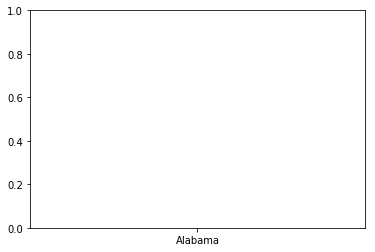

In [31]:
#Creates labels from count of Ride_ID
#labels = state_firearms_sum.index
#plt.bar(state_firearms, labels = labels, autopct = "%1.1f%%")

#objects = state_firearms_sum.index
x_axis = population_data
#y_pos = np.arange(len(objects))
y_axis = dec_handgun_df
#performance = [100,80,60,40,20,10]

#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.bar(y_axis, x_axis, align='center', alpha=0.1)
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, cities)

#plt.xticks(performance)
plt.ylabel('Firearm Transactions (Millions)')
plt.title('States & Territories')

plt.show()
plt.tight_layout()

ValueError: x and y must be the same size

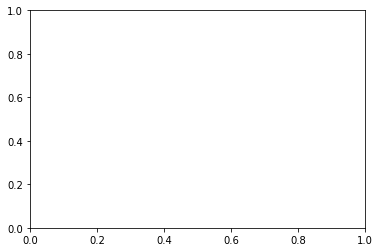

In [27]:
# Build a scatter plot for each data type
plt.scatter(population_data, df, marker="o", s=10)

# Incorporate the other graph properties
#plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.title("Population vs Handgun Registrations")
plt.ylabel("Population")
plt.xlabel("Handgun Registration")
plt.grid(True)

# Save the figure
#plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

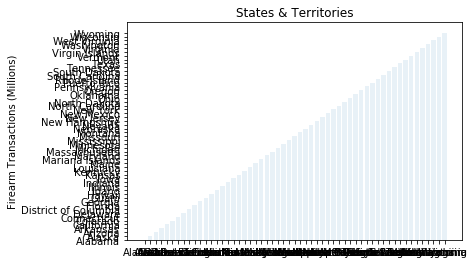

<Figure size 432x288 with 0 Axes>

In [42]:
#Creates labels from count of Ride_ID
#labels = state_firearms_sum.index
#plt.bar(state_firearms, labels = labels, autopct = "%1.1f%%")

#objects = state_firearms_sum.index
x_axis = state_handguns_sum.index
#y_pos = np.arange(len(objects))
y_axis = objects
#performance = [100,80,60,40,20,10]

#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.bar(y_axis, x_axis, align='center', alpha=0.1)
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, cities)

#plt.xticks(performance)
plt.ylabel('Firearm Transactions (Millions)')
plt.title('States & Territories')

plt.show()
plt.tight_layout()

(Gene) .csv Firearms graphs

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/20/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

Perform ####### (Tulgaa) API Calls

Perform ####### (Mike) API Calls
